### Studying Block 2

\begin{equation*}
 \det\left(\begin{bmatrix}
p_{22} &  p_{23} \\
p_{32} &  p_{33}
\end{bmatrix}\right)=p_{22}p_{33} - p_{23}^2
\end{equation*}


In [1]:
def simplify_local(p, repeat=2):
    c = var('c')    
    i=0
    while i<repeat:
        p = p.collect(c).combine(deep=True)
        lst0 = p.coefficients(c)    
        lst = []    
        for l0 in lst0:
            expr0, k = l0
            lst1 = expr0.operands()
            if len(lst1)<2:
                lst.append(expr0*c^k)
            for expr1 in lst1:
                try:
                    expr1 = expr1.canonicalize_radical().factor()
                except AttributeError:
                    continue
                #if len(p.variables())==1:
                #    pass
                expr1 = expr1*c^k
                lst.append(expr1)
        p = sum(lst).collect(c).combine(deep=True)
        i+=1
    return p

In [12]:
B2 = load('B2')
var('t')
assume(t>0, t<1)

### Block Entries 

In [13]:
p22 = B2[0][0]
p22 = simplify_local(p22,2)
show(p22)

-1/4*sqrt(2) + 4*t^2/(t^2 + 1)^3 - 4*t/((t^2 + 1)^(3/2)*(t + 1)^2) + 4*t/((t^2 + 1)^(3/2)*(t - 1)^2) + 1/(t + 1)^4 + 1/(t - 1)^4 - 2/((t + 1)^2*(t - 1)^2) + 9/16

In [14]:
p33 = B2[1][1]
p33 = simplify_local(p33,2)
show(p33)

1/32*sqrt(2)*(9*sqrt(2) - 8)/t^4 + 4/(t^2 + 1)^3 - 4/((t^2 + 1)^(3/2)*(t + 1)^2) - 4/((t^2 + 1)^(3/2)*(t - 1)^2) + 1/(t + 1)^4 + 1/(t - 1)^4 + 2/((t + 1)^2*(t - 1)^2)

In [15]:
p32 = B2[1][0]
p32 = simplify_local(p32,2)
show(p32)

1/2*(sqrt(2) + 3)*(sqrt(2) - 1)/(t^2 + 1)^(3/2) + 1/2*(sqrt(2) + 3)*(sqrt(2) - 1)/((t^2 + 1)^(3/2)*t) - 1/4*(2*sqrt(2) - 1)/(t + 1)^2 - 1/4*(2*sqrt(2) - 1)/(t - 1)^2 + 1/8*sqrt(2)*(sqrt(2) - 4)/((t + 1)^3*t) - 1/8*sqrt(2)*(sqrt(2) - 4)/((t - 1)^3*t) + 1/8*sqrt(2)*(sqrt(2) - 4)/((t + 1)^3*t^2) + 1/8*sqrt(2)*(sqrt(2) - 4)/((t - 1)^3*t^2)

In [16]:
p23 = B2[0][1]
p23 = simplify_local(p23,2)
show(p23)

1/2*(sqrt(2) + 3)*(sqrt(2) - 1)/(t^2 + 1)^(3/2) + 1/2*(sqrt(2) + 3)*(sqrt(2) - 1)/((t^2 + 1)^(3/2)*t) - 1/4*(2*sqrt(2) - 1)/(t + 1)^2 - 1/4*(2*sqrt(2) - 1)/(t - 1)^2 + 1/8*sqrt(2)*(sqrt(2) - 4)/((t + 1)^3*t) - 1/8*sqrt(2)*(sqrt(2) - 4)/((t - 1)^3*t) + 1/8*sqrt(2)*(sqrt(2) - 4)/((t + 1)^3*t^2) + 1/8*sqrt(2)*(sqrt(2) - 4)/((t - 1)^3*t^2)

### Determinant

In [18]:
import matplotlib.pyplot as plt
import numpy as np

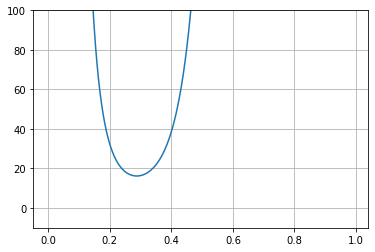

In [24]:
det = p22*p33 - p23**2
x = np.linspace(0.001,0.99, 1000)
y = [det(t=x0) for x0 in x]
plt.plot(x, y)
plt.ylim([-1e1, 1e2])
#plt.plot(x, 1000*[-0.5])
plt.grid()
plt.show()

### Strategy

- O Gráfico de $p22\cdot p33$ comparado ao gráfico de $(p23)^2$ sugere que $p22\cdot p33 > (p23)^2$

In [31]:
p = p22*p33
q = p23**2
x = np.linspace(0.001,0.99, 1000)
y = np.array([p(t=x0).n() for x0 in x])
yy = np.array([q(t=x0).n() for x0 in x])


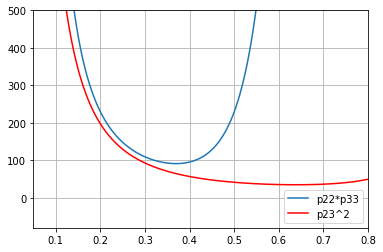

In [53]:
fig, ax = plt.subplots()
plt.plot(x, y, label='p22*p33')               # Gráfico de p222*p33
plt.plot(x, yy, color='red', label='p23^2') # Gráfico de p23**2
plt.ylim([-0.8e2, 0.5e3])
plt.xlim([0.05,.8 ])
plt.legend(loc='lower right')
plt.grid()
plt.show()